In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lstsq
from scipy.optimize import curve_fit, nnls
from itertools import product

In [2]:
expectations = np.load('zerotrackingfive.npz')

"""show the expectations available here"""
print('expectations available: {}'.format(expectations.files))

"""example for using the analysis code"""
J_field = expectations['current']
J_field_track = expectations['tracking_current']
phi = expectations['phi']
tracking_phi = expectations['tracking_phi']

expectations available: ['H', 'neighbour', 'lhopup', 'lhopdown', 'nup0', 'ndown0', 'D0', 'nup1', 'ndown1', 'D1', 'nup2', 'ndown2', 'D2', 'nup3', 'ndown3', 'D3', 'nup4', 'ndown4', 'D4', 'nup5', 'ndown5', 'D5', 'nup6', 'ndown6', 'D6', 'nup7', 'ndown7', 'D7', 'nup8', 'ndown8', 'D8', 'nup9', 'ndown9', 'D9', 'current', 'phi', 'tracking_current', 'tracking_phi', 'tracking_neighbour']


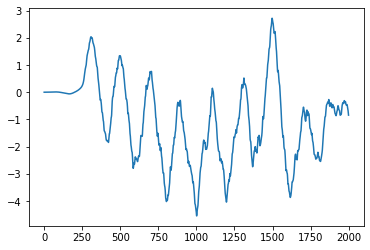

In [3]:
plt.plot(tracking_phi)
plt.show()

In [47]:
def Phi(t, f, s=0):
    """
    Transform limited pulse 
    """
    return np.sin(t) ** 2 * np.sin(f * t - s)

t = np.linspace(0, np.pi, phi.size)

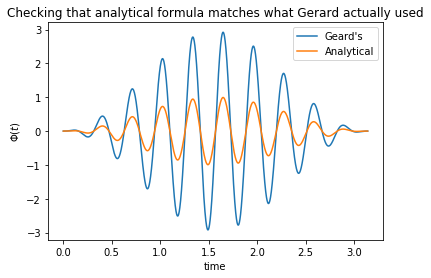

In [48]:
plt.title("Checking that analytical formula matches what Gerard actually used")
plt.plot(t, phi, label='Geard\'s')
plt.plot(t, Phi(t, 20), label='Analytical')

plt.legend()
plt.ylabel('$\Phi(t)$')
plt.xlabel('time')
plt.show()

In [60]:
# number of pulses to use
n = 4

def superoscilating_pulse(t, *args):
    
    ampl = args[:n]
    phase = args[n:]
    freq = np.linspace(10, 20, n)
    
    return sum(a * Phi(t, f, s) for a, f, s in zip(ampl, phase, freq))
    

In [63]:
popt, pcov = curve_fit(
    superoscilating_pulse, 
    t, 
    tracking_phi,
    p0=np.random.rand(2 *n),
    max_nfev=10000,
    bounds=(
        np.append(np.zeros(n), t.min() * np.ones(n)),
        np.append(np.inf * np.ones(n), t.max() * np.ones(n)),
    )
)

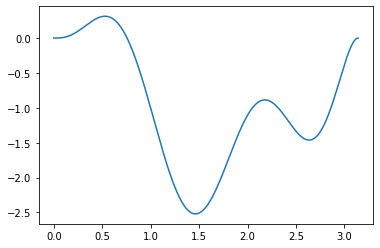

In [64]:
plt.plot(t, superoscilating_pulse(t, *popt))

In [106]:
n = 10

fields = np.array(
    [Phi(t, f, s) for f, s in product(np.linspace(0.2, 20, n), np.linspace(-2.5, 2.5, n))]
).T

In [107]:
x = nnls(fields, tracking_phi)[0]

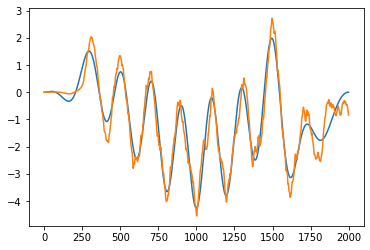

In [108]:
plt.plot(fields @ x)
plt.plot(tracking_phi)
plt.show()

In [9]:
np.arange(0.5, 20)

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5])